In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import requests
from IPython.display import Image

In [2]:
img = cv2.imread('lab2-chars.png', cv2.IMREAD_UNCHANGED)

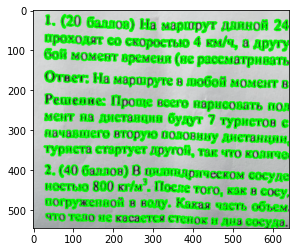

symbols in the image :  537


In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
  
blur = cv2.GaussianBlur(gray, (11, 11), 0) 
canny = cv2.Canny(blur, 30, 150, 3) 
dilated = cv2.dilate(canny, (1, 1), iterations=0) 
  
(cnt, hierarchy) = cv2.findContours( 
    dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2) 

plt.imshow(rgb)
plt.show()
  
print("symbols in the image : ", len(cnt)) 

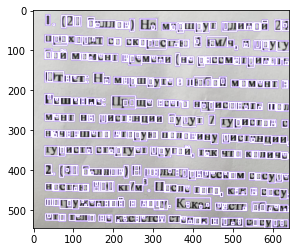

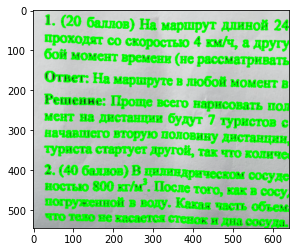

symbols in the image :  572


In [4]:
img = cv2.imread('lab2-chars.png', cv2.IMREAD_UNCHANGED)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.waitKey(0)

ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
cv2.waitKey(0)

ctrs, hier = cv2.findContours(thresh.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])

for i, ctr in enumerate(sorted_ctrs):
    x, y, w, h = cv2.boundingRect(ctr)
    roi = img[y:y + h, x:x + w]
    cv2.rectangle(img, (x, y), (x + w, y + h), (90, 0, 255), 2)

output = cv2.drawContours(rgb, sorted_ctrs, -1, (0, 255, 0), 2) 
plt.imshow(img)
plt.show()
plt.imshow(rgb)
plt.show()
print("symbols in the image : ", len(sorted_ctrs)) 